consider an image whose pixel valuea re confined to some speciifc range of values only. 

but a good image wil have pixels from all regions of the image. so wwe need to stretch this histogram to either ends. and tha is waht histogram equalization does. Simply, it improves the image contrast. 

This method usually increasaes the global contrast of many images. this is useful in images with background and foregrounds that are both bright or dark. this can loead to better views of bone structure in x-ray images, and better details in photographs that are ither under or over exposed. this method is adaptive to the input image and is **invertible**. the calculation is not computationall intensive either. It may increase the contrast of the background noise, while decreasing the usable signal. 

in images where spatial correlation is more importabt than the signal intensity, SNR ratio hampers viaual detections. 

it often produces unreaslistic effects in phootgraohs, but is usefull for images that ar enot in human visibility such as thermal, satellite or x-ray images. to which false colros are applied. 

It can also produce undesirable effets ith images  of low-color depth. It will work best when applied to inamges with much higher color dpeth than the palette size such as continous data or 16 bit images. 

**adaptive histogram equalization** is a variant that emphasizes local contrast rather than global contrast. . 



In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('../sample_imgs/bright.jpeg')
hist, bins = np.histogram(img.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()


/var/folders/b8/cky_62q57zxch2nprk7rqs0m0000gn/T/ipykernel_2397/1903037722.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.flatten(), 256, [0,256], color = 'r')


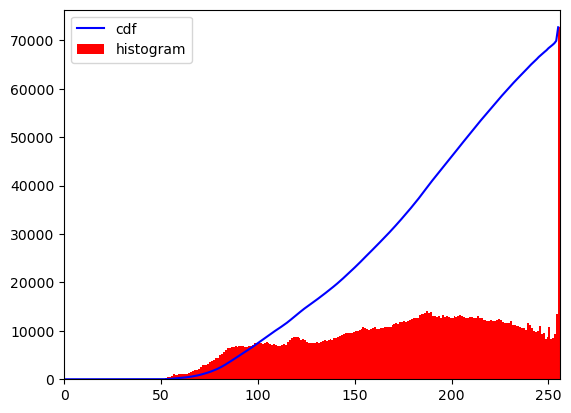

In [10]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

In [11]:
cdf_m = np.ma.masked_equal(cdf, 0)

In [12]:
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

In [17]:
equalized = cdf[img]
hist, bins = np.histogram(equalized.flatten(), 256, [0,256])
cdf_normalized = cdf * hist.max() / cdf.max()

/var/folders/b8/cky_62q57zxch2nprk7rqs0m0000gn/T/ipykernel_2397/1391702353.py:2: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.flatten(), 256, [0,256], color = 'r')


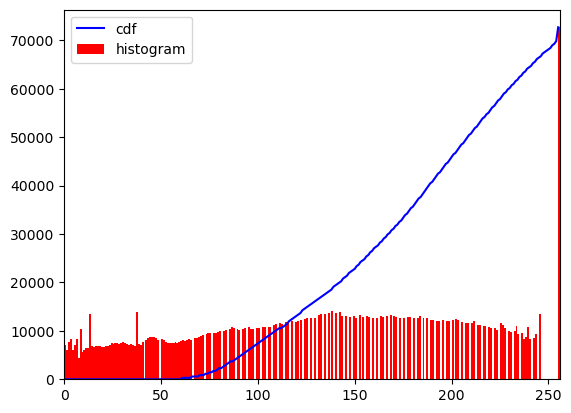

In [18]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

In many usecases, before training the data the images are histogram equalized to make them all the same lightin conditions.

### Histograms equalization in OpenCV

itsi input is a grayscale image and output is our histogram equalized image

In [20]:
img = cv2.imread('../sample_imgs/bright.jpeg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
cv2.imwrite('res.png', res)

True

/var/folders/b8/cky_62q57zxch2nprk7rqs0m0000gn/T/ipykernel_2397/1888539754.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.flatten(), 256, [0,256], color = 'r')


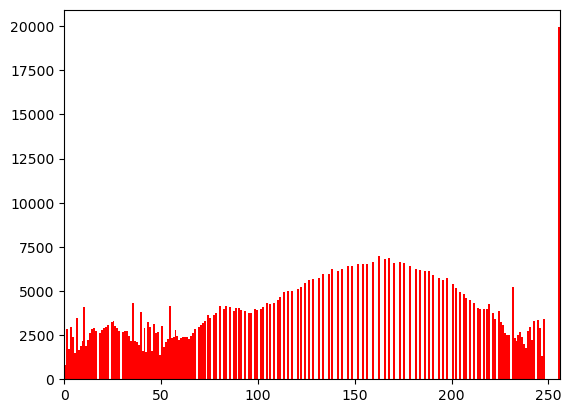

In [21]:
plt.hist(equ.flatten(), 256, [0,256], color = 'r')
plt.xlim([0,256])
plt.show()

Histogram equalization is good when histogram of the image is confied to a particular region. It wont work good in plces where there is large intensitu varitations where histogram covers a large region. 

## CLAHE (Contrast Limited Adaptive Histogram Equalization)

This technique divides the image into small blocks called "tiles", then each of the blocks are histogram equalized as usual. so, in a small are the histotgram would confie to a small region unless there is noise. If there is noise, it would be ampliefied, so to avodi this a contrast limiting is applied. 

If any histogram bin is above the specified contrast limit (by default 40), those pixels are clipped and distributed unformly to other bins before applying histogram normaliztion. to remove the articats in tile borders, bilinear interpolation is applied. 

In [25]:
import numpy as np
import cv2

img = cv2.imread('../sample_imgs/bright.jpeg',0)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize =(8,8))

cl1 = clahe.apply(img)
cv2.imwrite('../sample_imgs/clahe2.jpeg', cl1)

True

In [ ]:
import cv2
import numpy as np

# Read the color image
img = cv2.imread('../sample_imgs/bright.jpeg')

# Convert to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split into L, A, B channels
l, a, b = cv2.split(lab)

# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)

# Merge the processed L channel back with A and B
lab_clahe = cv2.merge((l_clahe, a, b))

# Convert back to BGR color space
final_img = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

# Save the output
cv2.imwrite('../sample_imgs/bright_better.jpeg', final_img)

# Display the images
cv2.imshow('Original', img)
cv2.imshow('CLAHE Applied', final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


2025-02-04 16:53:54.458 python[2397:113742] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-04 16:53:54.458 python[2397:113742] +[IMKInputSession subclass]: chose IMKInputSession_Modern
